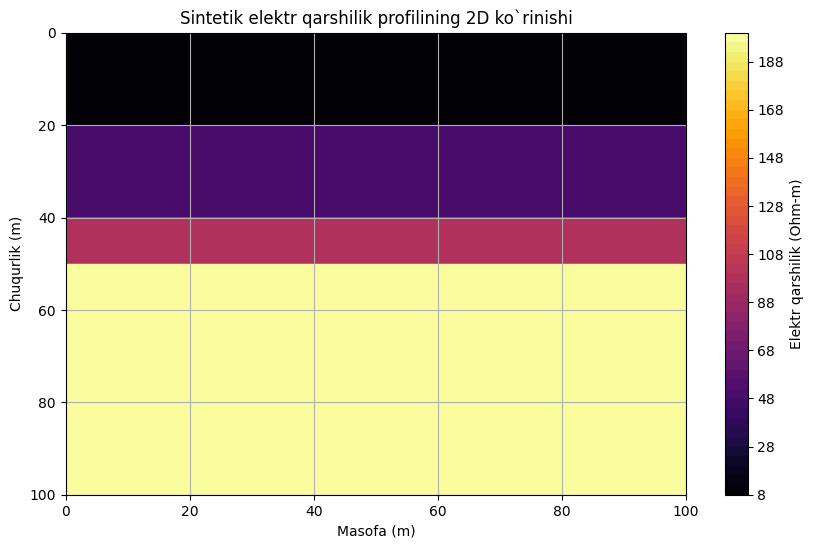

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Parametrlarni belgilash
depths=np.linspace(0, 100, 500) # Chuqurlik (m) 
distances=np.linspace(0, 100, 500) #masofa (m)

# qarshilik qiymatlarini aniqlash
resistivity = np.ones((len(depths), len(distances)))*200  # Dastlabki qarshilik qiymatlari (200 Oh.m)

# Qatlamlar qo'shish
resistivity[(depths < 20)]=10  # Qatlam 1
resistivity [(depths >=20) & (depths<40)] = 50 # Qatlam 2
resistivity [(depths >=40) & (depths <60)]=200 # qatlam 3

# Madan tanasini qo'shish
ore_start=40
ore_end=60
ore_depth_start = 38
ore_depth_end = 50
resistivity [(depths > ore_depth_start) & (depths<ore_depth_end) & ((distances > ore_start) & (distances < ore_end))]=100

# 2D Grafik yaratish
plt.figure(figsize=(10, 6))
plt.contourf(distances, depths, resistivity, levels=50, cmap='inferno')
plt.colorbar(label='Elektr qarshilik (Ohm-m)')
plt.xlabel('Masofa (m)')
plt.ylabel('Chuqurlik (m)')
plt.title('Sintetik elektr qarshilik profilining 2D ko`rinishi')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

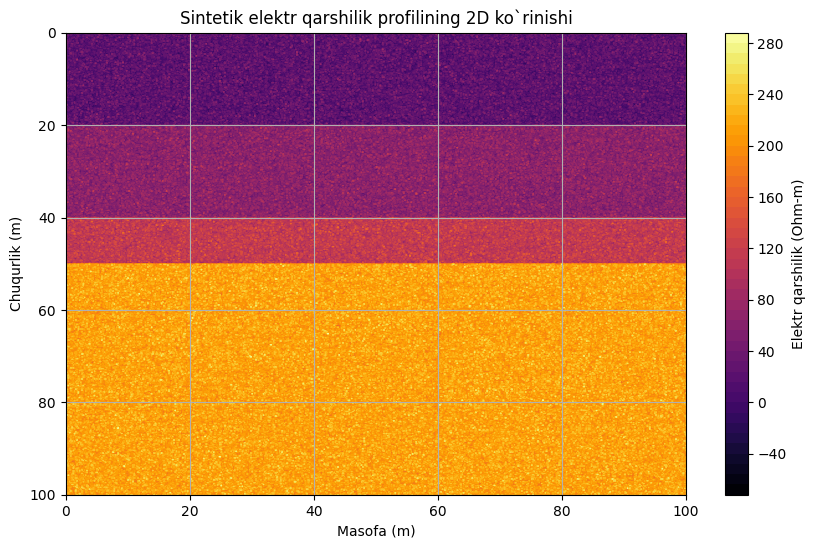

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Paramaetrlarni belgilash
depths=np.linspace(0, 100, 500)  # Chuqurlik (m) 
distances=np.linspace(0, 100, 500) # Masofa (m)

# Qarshilik qiymatlarini aniqlash
resistivity = np.ones((len(depths), len(distances)))*200 
resistivity[(depths < 20)]=10 
resistivity [(depths >=20) & (depths<40)] = 50 
resistivity [(depths >=40) & (depths <60)]=200 

# ma'dan tanasini qo'shish
ore_start=40
ore_end=60
ore_depth_start = 38
ore_depth_end = 50
resistivity [(depths > ore_depth_start) & (depths<ore_depth_end) & ((distances > ore_start) & (distances < ore_end))]=100

#Tasodifiy shovqin qo'shish
noise_level = 20 
resistivity+= noise_level*np.random.randn(*resistivity.shape)

# 2D Grafik yaratish
plt.figure(figsize=(10, 6))
plt.contourf(distances, depths, resistivity, levels=50, cmap='inferno')
plt.colorbar(label='Elektr qarshilik (Ohm-m)')
plt.xlabel('Masofa (m)')
plt.ylabel('Chuqurlik (m)')
plt.title('Sintetik elektr qarshilik profilining 2D ko`rinishi')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

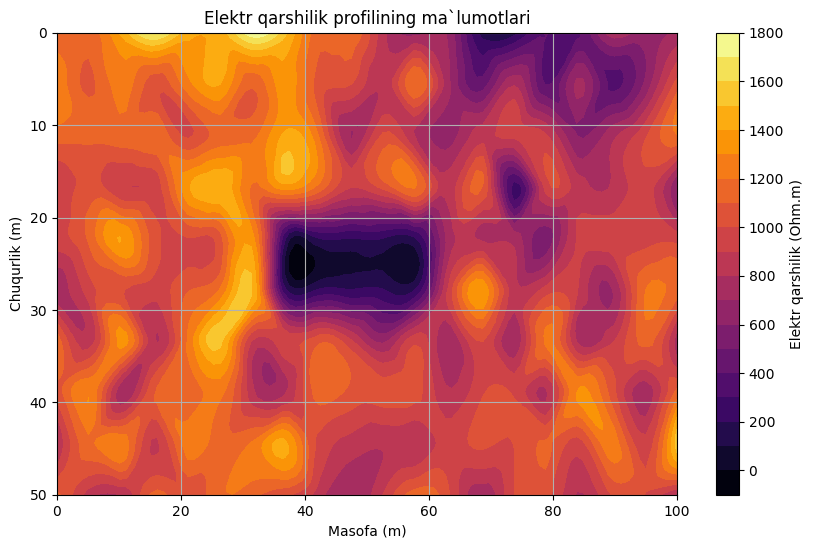

In [9]:
# Kerakli kutubxonalarni chaqirish
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata

# Sintetik elektr qarshilik ma'lumotlarini yaratish (Ohm.m)
np.random.seed(42)
x = np.linspace(0, 100, 20) # Profildagi nuqtalar (masofa, m)
z = np.linspace(0, 50, 10) # chuqurlik
x, z = np.meshgrid(x, z)

# Sintetik elektr qarshilik qiymatlari (Ohm.m)
# Yuqpri qarshilikli ruda tanasini simulyasiya uchun ba'zi hududlarni past qarshilikli qilish
resistivity = 1000 + 500 * np.sin(2 * np.pi * x / 100) * np.exp(-z / 20) + 200 * np.random.randn(*x.shape)
resistivity[4:6, 7:12] = 200  # Rudaning joylashuvi

# Ma'lumotlar interpolyatsiya qilish
xi = np.linspace(0, 100, 100)
zi = np.linspace(0, 50, 100)
resistivity_interp = griddata((x.flatten(), z.flatten()), resistivity.flatten(), (xi[None, :], zi[:, None]), method='cubic')

# Profil chizish
plt.figure(figsize=(10, 6))
cp = plt.contourf(xi, zi, resistivity_interp, levels=20, cmap='inferno')
plt.colorbar(cp, label='Elektr qarshilik (Ohm.m)')
plt.xlabel('Masofa (m)')
plt.ylabel('Chuqurlik (m)')
plt.title('Elektr qarshilik profilining ma`lumotlari')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Ruda tanasining joylashuvini tahlil qilish
rudalar = np.where(resistivity_interp < 300)
ruda_joylashuvi = list(zip(xi[rudalar[1]], zi[rudalar[0]]))

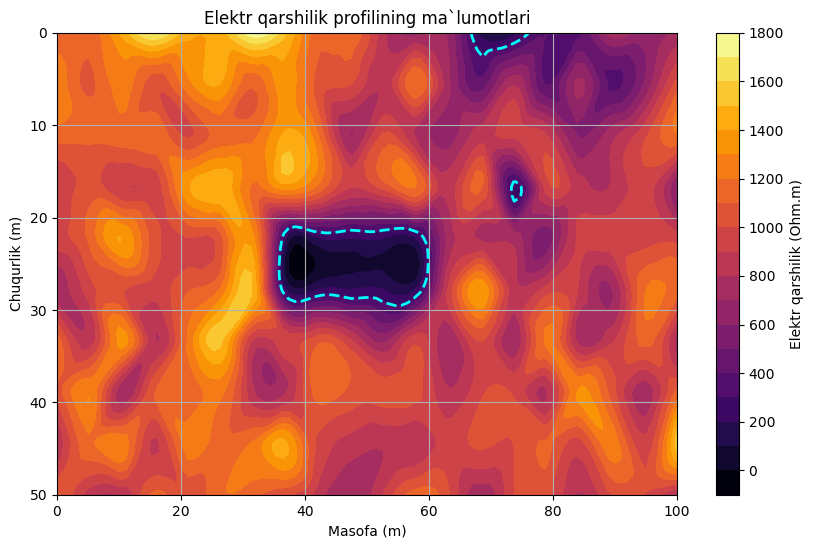

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import griddata

# Sinetik elektr qarshilik ma'lumotlarni yaratish (Ohm.m)
np.random.seed(42)
x = np.linspace(0,100, 20) # Profildagi nuqtalar (masofa, m)
z = np.linspace(0, 50, 10) # chuqurlik
x, z = np.meshgrid(x, z)

# Sintetik elektr qarshilik qiymatlari (Ohm.m)
resistivity = 1000 + 500 * np.sin(2 * np.pi * x / 100) * np.exp(-z / 20) + 200 * np.random.randn(*x.shape)
resistivity[4:6, 7:12] = 200 # Rudaning joylashuvi

# Ma'lumotlar interpolyatsiya qilish
xi = np.linspace(0, 100, 100)
zi = np.linspace(0, 50, 100)
xi, zi = np.meshgrid(xi,zi)
resistivity_interp = griddata((x.flatten(), z.flatten()), resistivity.flatten(), (xi, zi), method='cubic')

# 2D Grafik 
plt.figure(figsize=(10, 6))
cp = plt.contourf(xi, zi, resistivity_interp, levels=20, cmap='inferno')
plt.colorbar(cp, label='Elektr qarshilik (Ohm.m)')

#Qarshilik qiymatlari 300 Ohm.m dan kam bo'lgan joylarni shtrix chiziq  bilan belgilash
contour = plt.contour(xi, zi, resistivity_interp, levels=[300], colors='cyan', linestyles='--', linewidths=2)

plt.xlabel('Masofa (m)')
plt.ylabel('Chuqurlik (m)')
plt.title('Elektr qarshilik profilining ma`lumotlari')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Sinetik elektr qarshilik ma'lumotlarni yaratish (Ohm.m)
np.random.seed(42)
x = np.linspace(0, 100, 20) # Profildagi nuqtalar (masofa, m)
z = np.linspace(0, 50, 10) # chuqurlik
x, z = np.meshgrid(x, z)

# Sintetik elektr qarshilik qiymatlari (Ohm.m)
resistivity = 1000 + 500 * np.sin(2 * np.pi * x / 100) * np.exp(-z / 20) + 200 * np.random.randn(*x.shape)
resistivity[4:6, 7:12] = 200 # Rudaning joylashuvi

# Ma'lumotlar interpolyatsiya qilish
xi = np.linspace(0, 100, 100)
zi = np.linspace(0, 50, 100)
xi, zi = np.meshgrid(xi,zi)
resistivity_interp = griddata((x.flatten), z.flatten()),resistivity.flatten(), (xi, zi), method='cubic')

# 3D Grafik 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y  ma'lumotlarini tayorlash
x_flat = xi.flatten()
y_flat = zi.flatten()
z_flat = resistivity_interp.flatten()

# 3D sirt yaratish
surf = ax.plot_surface(xi, zi, resistivity_interp, cmap='inferno',edgecolor='none')

# Rangli bar qo'shish
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Elektr qarshilik (Ohm.m)')

# Grafikni sozlash
ax.set_xlabel('masofa (m)')
ax.set_ylabel('Chuqurlik (m)')
ax.set_zlabel('Elektr qarshilik (Ohm.m)')
ax.set_title('3D Elektr qarshilik profili')
              
plt.show()

<class 'SyntaxError'>: unmatched ')' (<ipython-input-4-13e4e4d578ec>, line 20)